# SARIMA
- about SARIMA: https://ai-trend.jp/basic-study/time-series-analysis/sarima_model/
- data: https://www.mhlw.go.jp/stf/covid-19/open-data.html

## Omajinai

In [1]:
from dateutil.relativedelta import relativedelta

import pandas as pd

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab"

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Data

In [3]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-02-08 20:32:38--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 18.65.148.99, 18.65.148.42, 18.65.148.47, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|18.65.148.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102322 (100K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>]  99.92K  --.-KB/s    in 0.08s   

2022-02-08 20:32:39 (1.29 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [102322/102322]



In [4]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
display(df.head(1))
display(df.tail(5))

(754, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-03,96748,3788,392,175,683,189,350,582,1374,925,...,339,259,5272,560,565,884,391,392,622,652
2022-02-04,95364,3543,460,202,697,152,325,500,1445,908,...,263,201,5120,538,566,916,500,368,685,709
2022-02-05,100870,4046,408,144,744,221,259,542,1555,856,...,313,248,5607,518,603,921,446,314,609,671
2022-02-06,89080,3464,428,122,617,174,195,514,1668,736,...,179,220,3946,335,422,653,388,323,523,511
2022-02-07,67984,2687,260,98,423,97,221,338,1487,466,...,159,136,3191,420,297,494,322,170,450,316


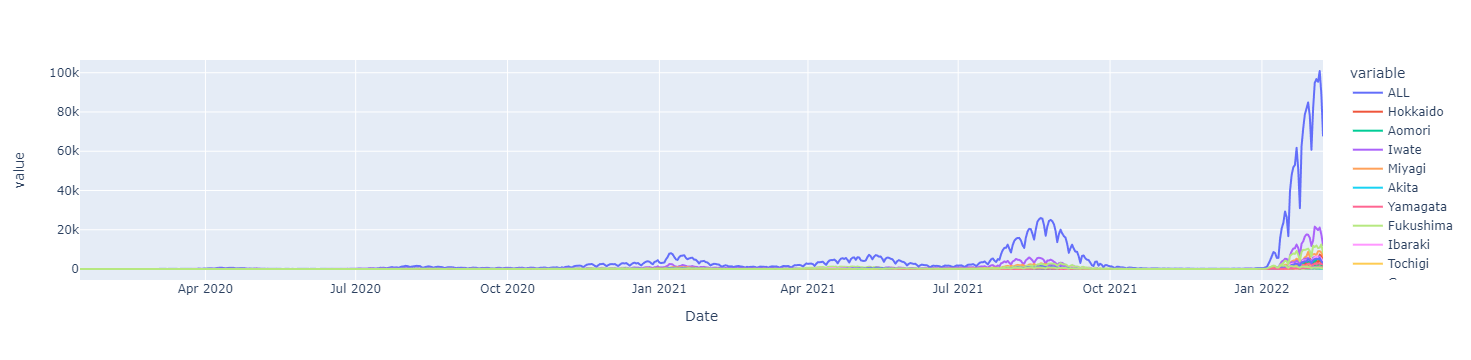

In [5]:
px.line(df, )

In [6]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).mean()
df_gr = df_gr.drop(df_gr.index[-1])
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(5))

(108, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-09,4625.428571,72.857143,5.428571,5.142857,11.142857,0.428571,5.142857,15.428571,41.428571,38.714286,...,16.142857,3.714286,106.857143,21.857143,20.000000,19.428571,10.714286,7.714286,53.142857,953.428571
2022-01-16,18116.714286,366.857143,74.285714,12.571429,58.285714,16.142857,28.571429,41.714286,227.000000,146.714286,...,120.428571,19.285714,654.285714,107.857143,118.000000,233.857143,62.285714,67.285714,80.857143,1380.142857
2022-01-23,45924.142857,1220.857143,183.857143,30.142857,185.428571,39.142857,61.285714,86.571429,641.285714,312.428571,...,222.000000,53.571429,1989.285714,212.142857,305.714286,461.285714,221.285714,242.857143,248.285714,1178.285714
2022-01-30,69765.714286,2251.428571,285.571429,113.000000,446.857143,216.571429,173.714286,333.571429,814.428571,563.571429,...,293.571429,149.571429,3645.857143,348.285714,539.857143,935.000000,371.571429,379.857143,516.428571,1009.571429
2022-02-06,88454.285714,3336.285714,379.142857,146.428571,618.428571,181.000000,263.571429,504.285714,1264.142857,822.571429,...,269.714286,218.285714,4630.000000,496.714286,550.000000,877.428571,430.857143,348.000000,605.428571,646.000000


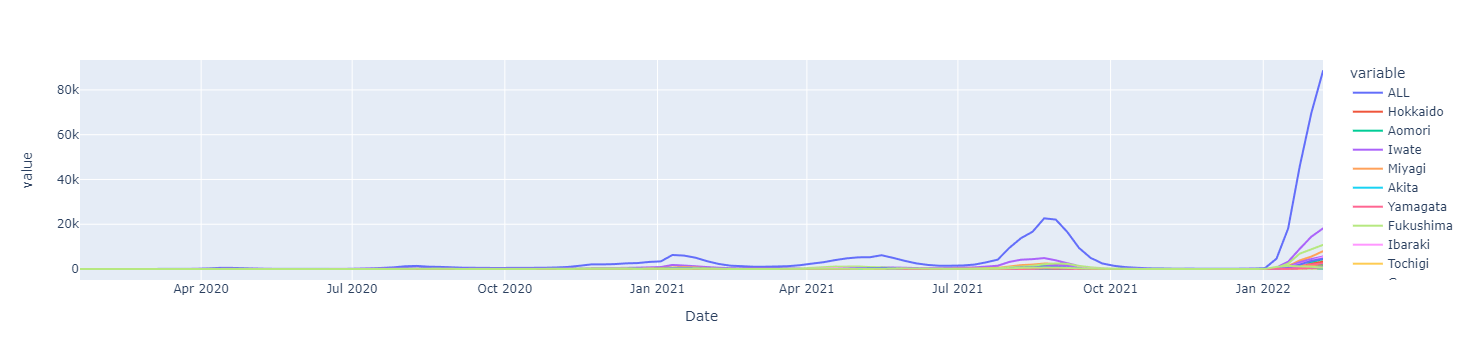

In [7]:
px.line(df_gr,)

## functions

In [8]:
import itertools

# 各パラメータの範囲を決める
p = d = q = range(1, 2)
P = D = Q = range(1, 2)
s = range(4, 32)

# p, d, q　の組み合わせを列挙するリストを作成
pdq = list(itertools.product(p, d, q))
# P, D, Q　の組み合わせを列挙するリストを作成すると同時に、後ろに　s = 12　を決め打ちでつけている。
PDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
#PDQs = [(x[0], x[1], x[2], x[3]) for x in list(itertools.product(P, D, Q, s))]

In [9]:
import warnings

warnings.filterwarnings("ignore") # warnings を表示させないようにする

def gridSearch(ts_train):
    best_params = [0, 0, 10000000]
    best_result = None
    for order in pdq:
        for seasonal_order in PDQs:
            try:
                model = SARIMAX(ts_train,
                              order = order,
                              seasonal_order=seasonal_order,
                              enforce_stationarity=True,
                              enforce_invertibility=True)

                result = model.fit(disp=False)

                if result.aic < best_params[2] and not result.aic < 100:
                    best_params = [order, seasonal_order, result.aic]
                    best_result = result
                    print('order{}, s_order{} - AIC: {}'.format(order, seasonal_order, result.aic))
            except KeyboardInterrupt:
                print('KeyboardInterrupt')
                return
            except:
                print('ERROR! Cannot fit! order{}, s_order{}'.format(order, seasonal_order))
                continue

    print('Best AIC model:', best_params)
    
    return best_result

In [10]:
%%time
result_all = gridSearch(df_gr.ALL)

order(1, 1, 1), s_order(1, 1, 1, 12) - AIC: 1732.38605952945
Best AIC model: [(1, 1, 1), (1, 1, 1, 12), 1732.38605952945]
CPU times: user 3.37 s, sys: 11.6 s, total: 15 s
Wall time: 1.27 s


In [11]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(df_gr.ALL, order=order, seasonal_order=seasonal_order)
result_all = model.fit(disp=False)
result_all.aic

1732.38605952945

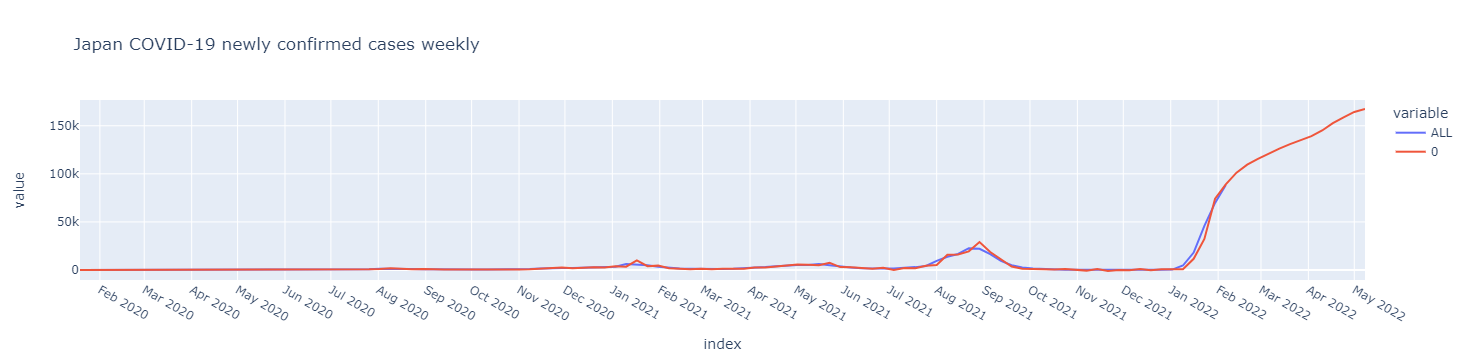

In [12]:
ts_forecast = result_all.predict(start=df_gr.index[0], end=df_gr.index[-1]+relativedelta(months=3))

temp_df = df_gr.ALL.to_frame()
temp_df = pd.concat([temp_df, ts_forecast])
fig = px.line(temp_df, title='Japan COVID-19 newly confirmed cases weekly')
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()

## SARIMA - Tokyo

In [13]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(df_gr.Tokyo, order=order, seasonal_order=seasonal_order)
result_tokyo = model.fit(disp=False)
result_tokyo.aic

1462.4598471006616

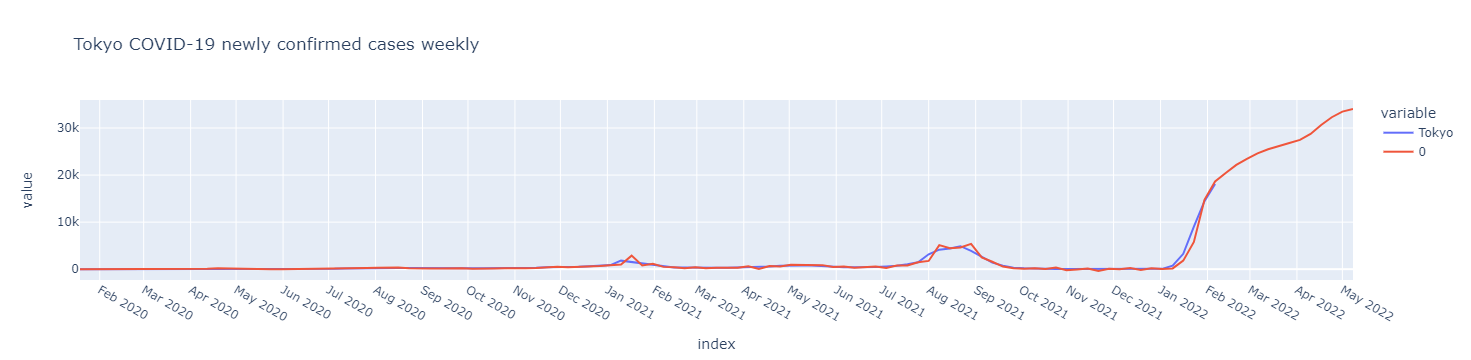

In [14]:
ts_forecast = result_tokyo.predict(start=df_gr.index[0], end=df_gr.index[-1]+relativedelta(months=3))
temp_df = df_gr.Tokyo.to_frame()
temp_df = pd.concat([temp_df, ts_forecast])

fig = px.line(temp_df, title='Tokyo COVID-19 newly confirmed cases weekly')
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()